In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import cv2
import os 
from keras import Sequential
from keras.layers import Flatten,Dense,BatchNormalization,Dropout,LeakyReLU,GlobalAveragePooling2D
from keras.optimizers import Adam,RMSprop
from keras.losses import BinaryCrossentropy
from keras.applications import ResNet50V2
from keras.callbacks import EarlyStopping
from keras import models
from keras import layers
from keras import optimizers
from keras.models import load_model

In [4]:
normal_total = glob.glob("data/NORMAL/*.jpeg")
pneumonia_total = glob.glob("data/PNEUMONIA/*.jpeg")

number_of_normal_img = len(normal_total)
number_of_pneumonia_img = len(pneumonia_total)
print("number of normal images:", number_of_normal_img)
print("number of pneumonia images:", number_of_pneumonia_img)

number of normal images: 1583
number of pneumonia images: 4273


<AxesSubplot:>

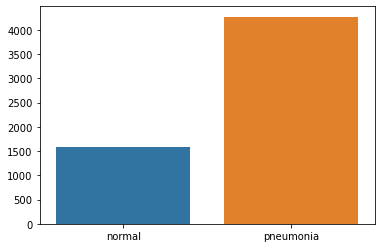

In [5]:
sns.barplot(x=['normal','pneumonia' ] , y=[number_of_normal_img, number_of_pneumonia_img] )

In [6]:
normal_total = glob.glob("data/NORMAL/*.jpeg")
pneumonia_virus = glob.glob("data/VIRUS/*.jpeg")
pneumonia_bacteria = glob.glob("data/BACTERIA/*.jpeg")

number_of_normal_img = len(normal_total)
number_of_virus_img = len(pneumonia_virus)
number_of_bacteria_img = len(pneumonia_bacteria)
print("number of normal images:", number_of_normal_img)
print("number of virus images:", number_of_virus_img )
print("number of bacteria images:", number_of_bacteria_img)


number of normal images: 1583
number of virus images: 1493
number of bacteria images: 2780


<AxesSubplot:>

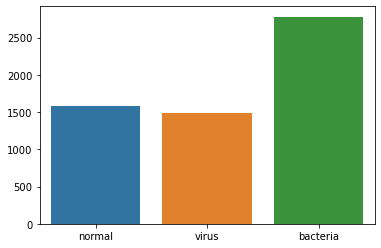

In [7]:
sns.barplot(x=['normal','virus', 'bacteria' ] , y=[number_of_normal_img, number_of_virus_img, number_of_bacteria_img] )

In [8]:
train_path = "data/split/train/"
test_path = "data/split/test/"
val_path = "data/split/val/"

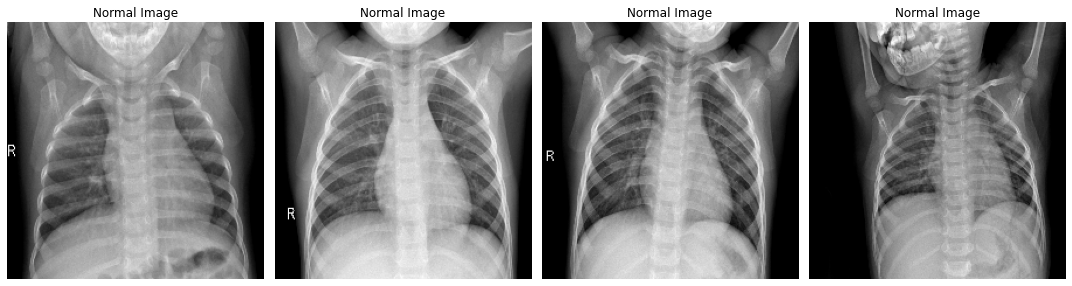

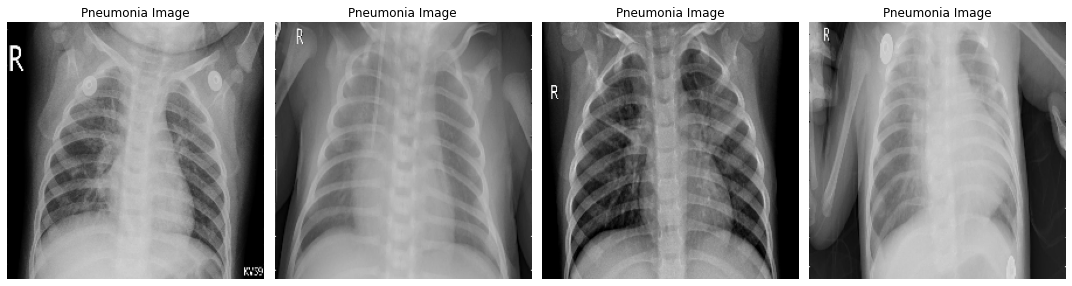

In [9]:

normal = glob.glob(train_path+"NORMAL/*.jpeg")
pneumonia = glob.glob(train_path+"PNEUMONIA/*.jpeg")

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15,10), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    img = cv2.imread(normal[i])
    img = cv2.resize(img, (220,220))
    ax.imshow(img)
    ax.axis("off")
    ax.set_title("Normal Image")
fig.tight_layout()       
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15,10), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    img = cv2.imread(pneumonia[i])
    img = cv2.resize(img, (220,220))
    ax.imshow(img)
    ax.axis("off")
    ax.set_title("Pneumonia Image")
fig.tight_layout()    
plt.show()


In [63]:
def plot_loss_accuracy(results):
    fig, axes = plt.subplots(1, 2, figsize=(10, 15))

    acc = results.history['acc']
    loss = results.history['loss']

    val_acc = results.history['val_acc']
    val_loss = results.history['val_loss']

    epochs = np.arange(1, len(acc) + 1)

    axes[0].plot(epochs, acc)
    axes[0].plot(epochs, val_acc)
    axes[0].set_title("Train and Validation Accuracies")
    axes[0].set_xlabel("Epoch")
    axes[0].set_ylabel("Accuracy")

    axes[1].plot(epochs, loss)
    axes[1].plot(epochs, val_loss)
    axes[1].set_title("Train and Validation Loss")
    axes[1].set_xlabel("Epoch")
    axes[1].set_ylabel("Binary cross-entropy loss")

    return fig

## Base CNN

In [10]:
train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        train_path , 
        target_size=(64, 64), batch_size = 180, class_mode='binary') 

Found 3514 images belonging to 2 classes.


In [11]:
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_path, 
        target_size=(64, 64), 
        batch_size = 180,
        class_mode='binary') 


val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        val_path, 
        target_size=(64, 64),
        batch_size = 32,
        class_mode='binary')

Found 1170 images belonging to 2 classes.
Found 1172 images belonging to 2 classes.


In [12]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(64 ,64,  3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (4, 4), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer= 'sgd',
              metrics=['acc'])

In [13]:
history_base = model.fit(train_generator, 
                                epochs=10, 
                                validation_data=val_generator)

Epoch 1/10
20/20 [==============================] - 34s 2s/step - loss: 0.6300 - acc: 0.7398 - val_loss: 0.5894 - val_acc: 0.7295
Epoch 2/10
20/20 [==============================] - 34s 2s/step - loss: 0.5858 - acc: 0.7321 - val_loss: 0.5842 - val_acc: 0.7295
Epoch 3/10
20/20 [==============================] - 34s 2s/step - loss: 0.5838 - acc: 0.7291 - val_loss: 0.5803 - val_acc: 0.7295
Epoch 4/10
20/20 [==============================] - 34s 2s/step - loss: 0.5857 - acc: 0.7228 - val_loss: 0.5760 - val_acc: 0.7295
Epoch 5/10
20/20 [==============================] - 36s 2s/step - loss: 0.5782 - acc: 0.7260 - val_loss: 0.5719 - val_acc: 0.7295
Epoch 6/10
20/20 [==============================] - 33s 2s/step - loss: 0.5688 - acc: 0.7335 - val_loss: 0.5678 - val_acc: 0.7295
Epoch 7/10
20/20 [==============================] - 33s 2s/step - loss: 0.5761 - acc: 0.7181 - val_loss: 0.5615 - val_acc: 0.7295
Epoch 8/10
20/20 [==============================] - 31s 2s/step - loss: 0.5602 - acc: 0.73

In [ ]:
#model.save('base_cnn__model.h5')

In [26]:
test_x, test_y = next(test_generator)

In [27]:
results_test = model.evaluate(test_x, test_y)

6/6 [==============================] - 0s 18ms/step - loss: 0.3945 - acc: 0.7778


In [ ]:
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
  print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
  print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
  print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
  print('Total Fraudulent Transactions: ', np.sum(cm[1]))

In [ ]:
#result in the probability of each target class for that specific image
nb_train_samples = len(train_generator.filenames) 
predict_size_train = int(math.ceil(nb_train_samples / batch_size)) 
y_hat_test = model.predict_generator(test_generator, steps=54)
plot_cm(test_generator.classes, y_hat_test)


In [25]:
#model = load_model('base_model.h5') 
model.summary()  

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0

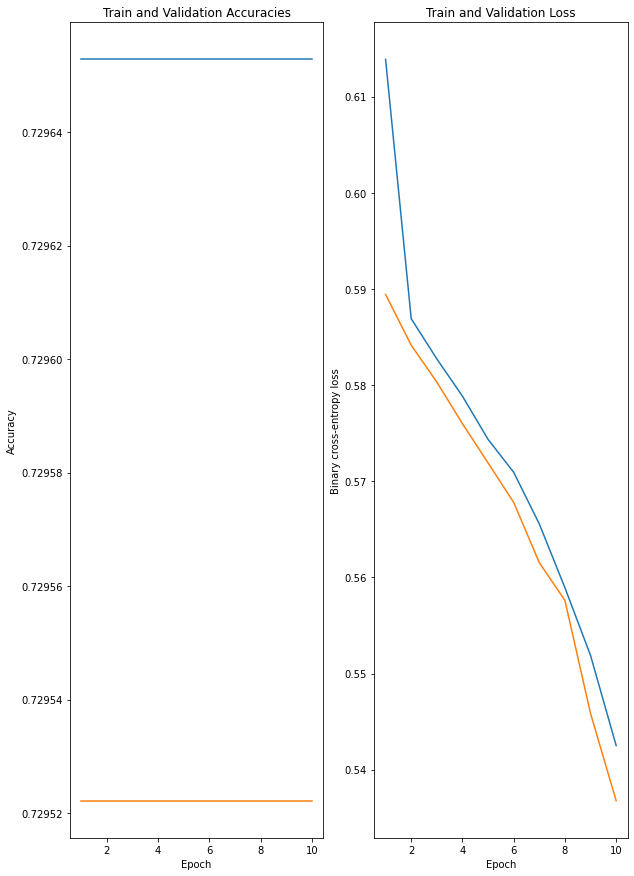

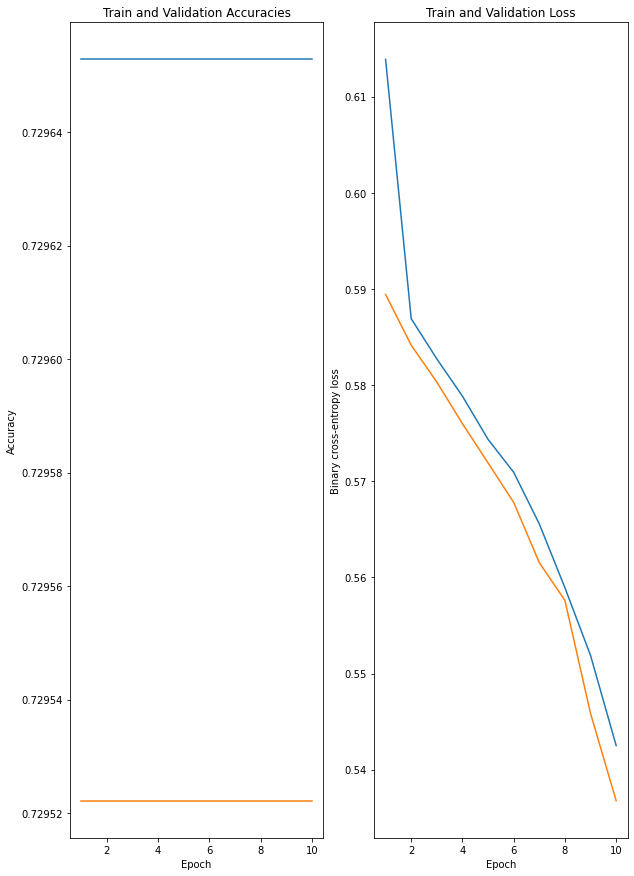

In [64]:
plot_loss_accuracy(history_base)

## Base CNN with Focal Loss to solve class imbalancement 

In [ ]:
#pip install focal-loss

In [17]:
from focal_loss import BinaryFocalLoss

In [18]:
model_fl = models.Sequential()
model_fl.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(64 ,64,  3)))
model_fl.add(layers.MaxPooling2D((2, 2)))

model_fl.add(layers.Conv2D(32, (4, 4), activation='relu'))
model_fl.add(layers.MaxPooling2D((2, 2)))

model_fl.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_fl.add(layers.MaxPooling2D((2, 2)))

model_fl.add(layers.Flatten())
model_fl.add(layers.Dense(64, activation='relu'))
model_fl.add(layers.Dense(1, activation='sigmoid'))

model_fl.compile(loss=BinaryFocalLoss(gamma=2),
              optimizer= 'sgd',
              metrics=['acc'])

In [19]:
history_base_fl = model.fit(train_generator, 
                                epochs=10, 
                                validation_data=val_generator)

Epoch 1/10
20/20 [==============================] - 33s 2s/step - loss: 0.5296 - acc: 0.7297 - val_loss: 0.5197 - val_acc: 0.7295
Epoch 2/10
20/20 [==============================] - 31s 2s/step - loss: 0.5134 - acc: 0.7297 - val_loss: 0.5062 - val_acc: 0.7372
Epoch 3/10
20/20 [==============================] - 31s 2s/step - loss: 0.4953 - acc: 0.7362 - val_loss: 0.4761 - val_acc: 0.7321
Epoch 4/10
20/20 [==============================] - 30s 1s/step - loss: 0.4731 - acc: 0.7587 - val_loss: 0.4656 - val_acc: 0.8575
Epoch 5/10
20/20 [==============================] - 30s 1s/step - loss: 0.4701 - acc: 0.8045 - val_loss: 0.4242 - val_acc: 0.8370
Epoch 6/10
20/20 [==============================] - 32s 2s/step - loss: 0.4779 - acc: 0.7917 - val_loss: 0.4618 - val_acc: 0.8797
Epoch 7/10
20/20 [==============================] - 32s 2s/step - loss: 0.4653 - acc: 0.7994 - val_loss: 0.4085 - val_acc: 0.8874
Epoch 8/10
20/20 [==============================] - 32s 2s/step - loss: 0.4298 - acc: 0.81

In [28]:
test_x_fl, test_y_fl = next(test_generator)

In [29]:
results_test = model_fl.evaluate(test_x_fl, test_y_fl)

6/6 [==============================] - 0s 17ms/step - loss: 0.1738 - acc: 0.4389


In [30]:
model_fl.summary()  

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 32)        16416     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)             

In [ ]:
from sklearn.utils import class_weight
class_weights = dict(zip(np.unique(y_train), class_weight.compute_class_weight('balanced',np.unique(y_train),y_train)))

## Image Augumentation 

In [52]:
train_datagen_aug = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=40, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.3, 
                                   zoom_range=0.1, 
                                   horizontal_flip=False)

In [58]:
train_aug = train_datagen_aug.flow_from_directory(train_path,
                                               batch_size=128,
                                               target_size=(64,64),
                                               color_mode="rgb",
                                               class_mode="binary",
                                               shuffle=True,
                                               seed=42,
                                               subset="training")

test_aug = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_path, 
        target_size=(64, 64), 
        batch_size = 180,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary') 

# get all the data in the directory split/validation (200 images), and reshape them
val_aug = ImageDataGenerator(rescale=1./255).flow_from_directory(
        val_path, 
        target_size=(64, 64),
        batch_size = 32,
        class_mode='binary')

Found 3514 images belonging to 2 classes.
Found 1170 images belonging to 2 classes.
Found 1172 images belonging to 2 classes.


In [59]:
model_aug = models.Sequential()
model_aug.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(64 ,64,  3)))
model_aug.add(layers.MaxPooling2D((2, 2)))

model_aug.add(layers.Conv2D(32, (4, 4), activation='relu'))
model_aug.add(layers.MaxPooling2D((2, 2)))

model_aug.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_aug.add(layers.MaxPooling2D((2, 2)))

model_aug.add(layers.Flatten())
model_aug.add(layers.Dense(64, activation='relu'))
model_aug.add(layers.Dense(1, activation='sigmoid'))

model_aug.compile(loss=BinaryFocalLoss(gamma=2),
              optimizer= 'sgd',
              metrics=['acc'])

In [60]:
history_aug = model_aug.fit(train_aug, 
                                epochs=10, 
                                validation_data=val_aug)

Epoch 1/10
28/28 [==============================] - 37s 1s/step - loss: 0.1647 - acc: 0.6585 - val_loss: 0.1503 - val_acc: 0.7295
Epoch 2/10
28/28 [==============================] - 36s 1s/step - loss: 0.1507 - acc: 0.7329 - val_loss: 0.1492 - val_acc: 0.7295
Epoch 3/10
28/28 [==============================] - 36s 1s/step - loss: 0.1501 - acc: 0.7299 - val_loss: 0.1489 - val_acc: 0.7295
Epoch 4/10
28/28 [==============================] - 36s 1s/step - loss: 0.1487 - acc: 0.7340 - val_loss: 0.1486 - val_acc: 0.7295
Epoch 5/10
28/28 [==============================] - 36s 1s/step - loss: 0.1523 - acc: 0.7195 - val_loss: 0.1483 - val_acc: 0.7295
Epoch 6/10
28/28 [==============================] - 37s 1s/step - loss: 0.1484 - acc: 0.7345 - val_loss: 0.1478 - val_acc: 0.7295
Epoch 7/10
28/28 [==============================] - 36s 1s/step - loss: 0.1502 - acc: 0.7250 - val_loss: 0.1476 - val_acc: 0.7295
Epoch 8/10
28/28 [==============================] - 36s 1s/step - loss: 0.1497 - acc: 0.72

In [61]:
test_results_aug = model_aug.evaluate(test_aug)

7/7 [==============================] - 8s 1s/step - loss: 0.1472 - acc: 0.7299


In [62]:
model_aug.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 28, 28, 32)        16416     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 2304)             

## Transfer Learning ResNet50V2 + Image Augumentation 

In [31]:
train_generator2 = ImageDataGenerator(rescale=1./255, horizontal_flip=True, zoom_range=0.3)
val_generator2 = ImageDataGenerator(rescale=1./255)
test_generator2 = ImageDataGenerator(rescale=1./255)

In [32]:
train2 = train_generator2.flow_from_directory(train_path,
                                               batch_size=128,
                                               target_size=(220,220),
                                               color_mode="rgb",
                                               class_mode="binary",
                                               shuffle=True,
                                               seed=42,
                                               subset="training")

Found 3514 images belonging to 2 classes.


In [33]:
val2 = val_generator2.flow_from_directory(val_path,
                                               batch_size=4,
                                               target_size=(220,220),
                                               color_mode="rgb",
                                               class_mode="binary",
                                               shuffle=True,
                                               seed=42)

Found 1172 images belonging to 2 classes.


In [34]:
test2 = test_generator2.flow_from_directory(test_path,
                                          batch_size=32,
                                          target_size=(220,220),
                                          color_mode="rgb",
                                          class_mode="binary")

Found 1170 images belonging to 2 classes.


In [35]:
resnet50 = ResNet50V2(weights = "imagenet", input_shape = (220,220,3), include_top = False)

In [36]:
model2 = Sequential()

model2.add(resnet50)    
model2.add(Flatten())
model2.add(Dense(units = 128, activation = "relu"))
model2.add(Dropout(0.5))

model2.add(Dense(units = 1, activation = "sigmoid"))

In [37]:
resnet50.trainable = False

# You can check whether a layer is trainable (or alter its setting) through the layer.trainable attribute
for layer in model2.layers:
    print(layer.name, layer.trainable)
    
# Similarly, we can check how many trainable weights are in the model 
print(len(model2.trainable_weights))

resnet50v2 False
flatten_2 True
dense_4 True
dropout True
dense_5 True
4


In [38]:
model2.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [39]:
hist2 = model2.fit(train2,validation_data=val2,epochs=5)

Epoch 1/5
28/28 [==============================] - 411s 15s/step - loss: 6.1464 - accuracy: 0.7357 - val_loss: 0.2740 - val_accuracy: 0.9206
Epoch 2/5
28/28 [==============================] - 396s 14s/step - loss: 0.2804 - accuracy: 0.8590 - val_loss: 0.2295 - val_accuracy: 0.9317
Epoch 3/5
28/28 [==============================] - 398s 14s/step - loss: 0.2582 - accuracy: 0.8953 - val_loss: 0.1856 - val_accuracy: 0.9411
Epoch 4/5
28/28 [==============================] - 405s 15s/step - loss: 0.2155 - accuracy: 0.9042 - val_loss: 0.1769 - val_accuracy: 0.9292
Epoch 5/5
28/28 [==============================] - 395s 14s/step - loss: 0.2072 - accuracy: 0.9269 - val_loss: 0.1622 - val_accuracy: 0.9360


In [ ]:
#model2.save('ResNet50_cnn__model.h5')

In [40]:
test_results2 = model2.evaluate(test2)

37/37 [==============================] - 89s 2s/step - loss: 0.1588 - accuracy: 0.9470


In [41]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Functional)      (None, 7, 7, 2048)        23564800  
_________________________________________________________________
flatten_2 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               12845184  
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total params: 36,410,113
Trainable params: 12,845,313
Non-trainable params: 23,564,800
_________________________________________________________________


In [42]:
#pip install pydot

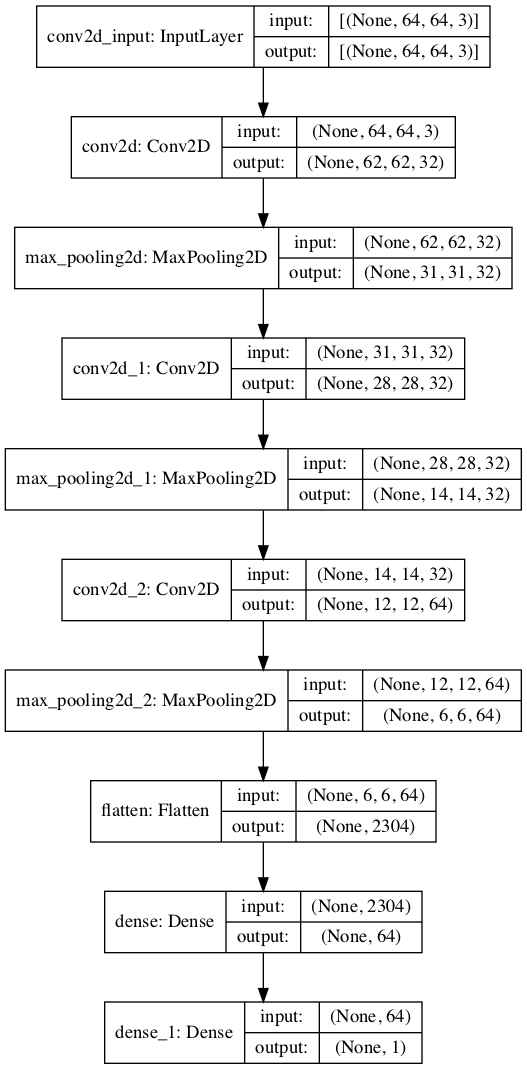

In [43]:
tf.keras.utils.plot_model(
    model, to_file='model1.png', show_layer_names=True, show_shapes=True)

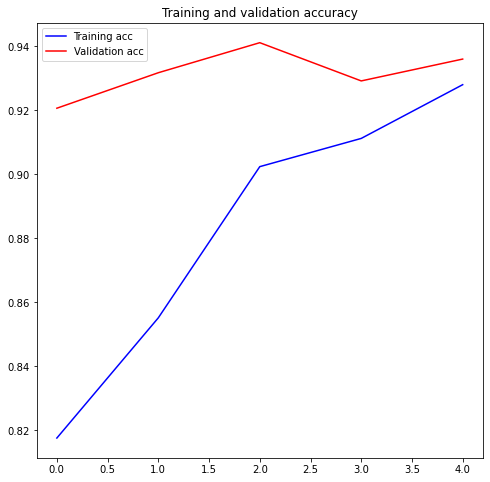

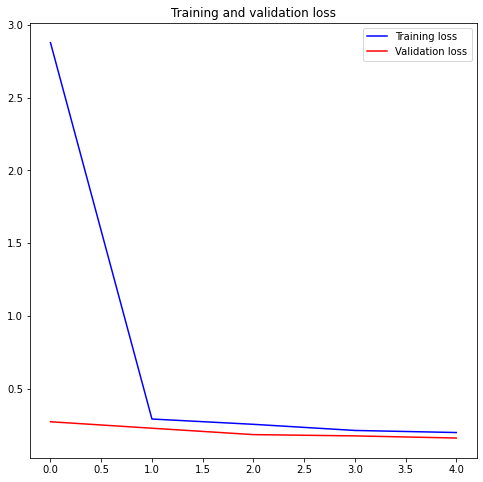

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline 

acc = hist2.history['accuracy']
val_acc = hist2.history['val_accuracy']
loss = hist2.history['loss']
val_loss = hist2.history['val_loss']
epochs = range(len(acc))
plt.figure(figsize=(8,8))
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure(figsize=(8,8))
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
y_hat_test = model2.predict_generator(test_generator2)

## Fuctions to Consider

In [ ]:
def prepareImages(train, shape, data_path, mode):
    for index, row in train.iterrows():
        has_volcano = row['Volcano?']
        ...
        if has_volcano and mode == 'train':
            x_train[count] = img_to_array( cv2.flip( img, 1 ) )
            y_train[count] = int(has_volcano)
            count += 1

In [ ]:
#The augmentation is rotating the image by 10 degrees and change image brightness with a range of 0.2 to 1.0 (We also can do different data augmentation as well).

from keras.utils.data_utils import Sequence
from imblearn.over_sampling import RandomOverSampler
from imblearn.tensorflow import balanced_batch_generator


class BalancedDataGenerator(Sequence):
    """ImageDataGenerator + RandomOversampling"""
    def __init__(self, x, y, datagen, batch_size=32):
        self.datagen = datagen
        self.batch_size = min(batch_size, x.shape[0])
        datagen.fit(x)
        self.gen, self.steps_per_epoch = balanced_batch_generator(x.reshape(x.shape[0], -1), y, sampler=RandomOverSampler(), batch_size=self.batch_size, keep_sparse=True)
        self._shape = (self.steps_per_epoch * batch_size, *x.shape[1:])
        
    def __len__(self):
        return self.steps_per_epoch


    def __getitem__(self, idx):
        x_batch, y_batch = self.gen.__next__()
        x_batch = x_batch.reshape(-1, *self._shape[1:])
        return self.datagen.flow(x_batch, y_batch, batch_size=self.batch_size).next()

balanced_gen = BalancedDataGenerator(X_train, y_train, datagen, batch_size=64)
balanced_gen_val = BalancedDataGenerator(X_val, y_val, datagen, batch_size=64)
steps_per_epoch = balanced_gen.steps_per_epoch
